<a href="https://colab.research.google.com/github/hanmisil/HanMisil-Portfolio/blob/main/AI-Study/fashion_mnist_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

src=list(files.upload().values())[0]
open('minivggnet.py','wb').write(src)

KeyboardInterrupt: ignored

<h1>케라스와 텐서플로우</h1>

-  keras는 tensorflow또는 theano 래퍼로 작동하는 Python으로 작성된 간단한 고급 신경 네트워크 라이브라리이다. keras를 사용하는 것은 로고 블록을 사용하는 것돠 같다.

- tensorflow는 잘 알려진 것처럼 구글에서 개발하고 오픈소스로 공개한 머신러닝 라이브러리이다. keras 역시 라이브러리이지만 keras는 tensorflow위에서 동작하는 라이브러리 이다.

<h1>backend</h1>

- keras는 model-level의 라이브러리이기 때문에 딥러닝 모델을 만들 때 레이어를 제공한다. 그래서 low-level과 관련된 연산을 핸들링하지 못한다. 그 대신 keras는 backend로서 tensorflow 등을 사용할 수 있다.

<h1>케라스 백엔드, 텐서플로우</h1>

- 케라스는 텐서 곱, 합성곱과 같은 저수잔

In [ ]:
 # set the matplotlib backend so figures can be saved in the background
 import matplotlib
 matplotlib.use("Agg")

 # import the necessary packages
 from minivggnet import MiniVGGNet
 #import minivggnet
 # classification_report를 사용하여 최종적인 분류의 통계/정확성을 인쇄함
 from sklearn.metrics import classification_report
 from keras.optimizers import SGD
 from keras.datasets import fashion_mnist
 from keras.utils import np_utils
 # 백엔드 사용하기 위해
 from keras import backend as K
 # imutils의 build_montages 함수는 시각화에 사용됨
 from imutils import build_montages
 import matplotlib.pyplot as plt
 import numpy as np
 import cv2
 import keras

 # initialize the number of epochs to train for, base learning rate,
 # and batch size
 NUM_EPOCHS = 25
 INIT_LR = 1e-2
 BS = 32

Using TensorFlow backend.


In [ ]:
 print("[INFO] loading Fashion MNIST...")
 #fashion_mnist = keras.datasets.fashion_mnist
 ((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# if we are using "channels first" ordering, then reshape the design matrix
# such that the matrix is: num_samples x depth x rows x columns
 if K.image_data_format() == "channels_first":
    trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
    testX = testX.reshape((testX.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design matrix shape should be:
# num_samples x rows x columns x depth
# keras의 백엔드로 tensorflow를 사용하고 있는 경우 순서는 "channels_last"를 사용

 else:
    trainX = trainX.reshape((trainX.shape[0], 28, 28,1))
    testX = testX.reshape((testX.shape[0], 28, 28,1))

[INFO] loading Fashion MNIST...
4423680/4422102 [==============================] - 2s 0us/step


In [ ]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
trainX.shape

(60000, 28, 28, 1)

In [ ]:
testX.shape

(10000, 28, 28, 1)

In [ ]:
testY.shape

(10000,)

In [ ]:
plt.figure()
plt.cv2_imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
 # scale data to the range of [0, 1]
 # 데이터 정규화
 trainX = trainX.astype("float32") / 255.0
 testX = testX.astype("float32") / 255.0

 # one-hot encode the training and testing labels
 # one-hot 인코딩
 trainY = np_utils.to_categorical(trainY, 10)
 testY = np_utils.to_categorical(testY, 10)

 # initialize the label names
 # fashin mnist는 10개의 클래스를 가지고 있음
 labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
plt.figure()
cv2_imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import time

In [ ]:
 # initialize the optimizer and model
 start=time.time()
 print("[INFO] compiling model...")

 # SGD : Stochastic gradient descent(SGD, 확률적 경사하강법)
 # 추출된 데이터 한 개에 대해서 error gradient 를 계산하고, Gradient descent 알고리즘을 적용하는 방법.
 # 배치크기가 1인 경사하강법 알고리즘
 # 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산한다.
 # 정확하지 않을 수 있지만, 계산 속도가 훨씬 빠으다.
 opt = SGD(lr=INIT_LR,
           =0.9, decay=INIT_LR / NUM_EPOCHS)
 model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
 model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

 # train the network
 print("[INFO] training model...")
 H = model.fit(trainX, trainY,  validation_data=(testX, testY), batch_size=BS, epochs=NUM_EPOCHS)
 print("time :",( time.time() - start)/60,"분")

[INFO] compiling model...
[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 41s 685us/step - loss: 0.5400 - accuracy: 0.8185 - val_loss: 0.3281 - val_accuracy: 0.8812
Epoch 2/5
60000/60000 [==============================] - 34s 575us/step - loss: 0.3436 - accuracy: 0.8791 - val_loss: 0.2845 - val_accuracy: 0.8959
Epoch 3/5
60000/60000 [==============================] - 35s 578us/step - loss: 0.2936 - accuracy: 0.8942 - val_loss: 0.2489 - val_accuracy: 0.9077
Epoch 4/5
60000/60000 [==============================] - 35s 582us/step - loss: 0.2699 - accuracy: 0.9031 - val_loss: 0.2335 - val_accuracy: 0.9153
Epoch 5/5
60000/60000 [==============================] - 35s 575us/step - loss: 0.2509 - accuracy: 0.9086 - val_loss: 0.2194 - val_accuracy: 0.9214
time : 3.1550304690996804 분


In [ ]:
print(K.image_data_format())

channels_last


In [ ]:
H.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [ ]:
 # make predictions on the test set
 preds = model.predict(testX)

 # show a nicely formatted classification report
 print("[INFO] evaluating network...")
 print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

 # plot the training loss and accuracy
 N = NUM_EPOCHS
 # N=5
 plt.style.use("ggplot")
 plt.figure()
 plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
 plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
 plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
 plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
 plt.title("Training Loss and Accuracy on Dataset")
 plt.xlabel("Epoch #")
 plt.ylabel("Loss/Accuracy")
 plt.legend(loc="lower left")
 plt.savefig("./gdrive/My Drive/Colab Notebooks/plot.png")
 #plt.savefig("plot.png")

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.91      0.86      0.88      1000
     trouser       1.00      0.99      0.99      1000
    pullover       0.91      0.90      0.91      1000
       dress       0.93      0.93      0.93      1000
        coat       0.87      0.92      0.90      1000
      sandal       0.99      0.99      0.99      1000
       shirt       0.79      0.80      0.79      1000
     sneaker       0.96      0.99      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


In [ ]:
 # initialize our list of output images
 images = []

 # randomly select a few testing fashion items
 for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
    # classify the clothing
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labelNames[prediction[0]]

    # extract the image from the testData if using "channels_first"
    # ordering
    if K.image_data_format() == "channels_first":
       image = (testX[i][0] * 255).astype("uint8")
     # otherwise we are using "channels_last" ordering
    else:
       image = (testX[i] * 255).astype("uint8")
       # initialize the text label color as green (correct)
    color = (0, 255, 0)
ㅋ
    if prediction[0] != np.argmax(testY[i]):
       color = (0, 0, 255)

    # merge the channels into one image and resize the image from
    # 28x28 to 96x96 so we can better see it and then draw the predicted label on the image
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    # add the image to our list of output images
    images.append(image)

 # construct the montage for the images
 montage = build_montages(images, (96, 96), (4, 4))[0]

 # show the output montage
 # cv2.imshow("Fashion MNIST", montage)
 # cv2.waitKey(0)

In [ ]:
testX[np.newaxis, 50]

NameError: ignored

In [ ]:
from os import path
from google.colab import drive

notebooks_dir_name = 'notebooks'
drive.mount('/content/gdrive')
notebooks_base_dir = path.join('./gdrive/My Drive/', notebooks_dir_name)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.download( "plot.png" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

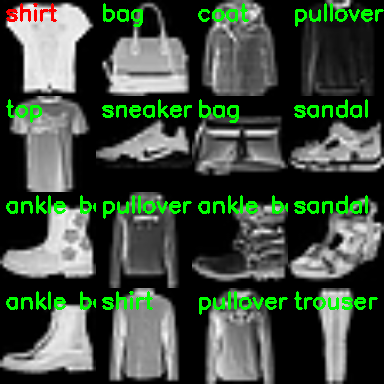

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(montage)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)       

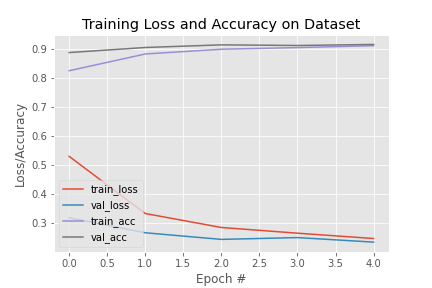

In [ ]:
from IPython.display import Image
Image('plot.png')